In [40]:
import pandas as pd
import numpy as np
import pdb
import os

In [112]:
cd run_scripts/

/home/qudgks/workspace/gpu8/CLAD-master/src/run_scripts


In [113]:
df = pd.read_csv('result.csv')

In [60]:
df_snips = df.iloc[1316:1698]

In [138]:
df_rostd = df.iloc[1698:]

In [139]:
def name_normal(path):
    with open(path, "r") as f:
        strings = f.read()
        a = strings.split("dataset name : ")[1]
        name = a.split("classifier")[0]
        b = a.split("normal_class_index_list :")[1]
        normal = b.split("n_hidden_features")[0]
        cc = strings.split("cluster_num=")[1]
        num = cc.split(", cluster_type=")[0]
        normal = normal.strip()
        name = name.strip()
        cc = strings.split("classifier_epochs=")[1]
        epoch = cc.split(",")[0]
        cc = strings.split("cluster_type=")[1]
        cluster_type = cc.split(",")[0]
        cc = strings.split("classifier_type=")[1]
        classifier_type = cc.split(",")[0]        
        cc = strings.split("language_model=")[1]
        LM = cc.split(",")[0]                
        f.close()
        return LM

In [140]:
df_rostd.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'time', 'cluster_type',
       'classifier_type', 'cluster_num', 'Normal_class', 'base_auroc',
       'odin_auroc', 'thresholds', 'one_ class', 'multi_ class', 'silhouette',
       'db_score', 'ch_score', 'cluster_epochs', 'cluster_lr',
       'classifier_epochs', 'OC_SVM', 'normal_distance', 'cosin distance',
       'u distane', 'before_PLL_s', 'before_PLL_m', 'silhouette_b',
       'silhouette_a', 'pooling', 'one_lw', 'one_emp', 'one_sh', 'one_osa',
       'multi_lw', 'multi_emp', 'multi_sh', 'multi_osa', 'NMI', 'ARI',
       'cluster_acc'],
      dtype='object')

In [141]:
cwd = '/home/qudgks/workspace/gpu8/CLAD-master/src/log'
LM_list = []
for i in df_rostd.iterrows():
    date = i[1]['Date']
    time = i[1]['time']    
    path = cwd + f'/{date}/{time}'
    os.chdir(path)
    path_txt = [i for i in os.listdir() if "bert" in i][0]
    LM = name_normal(path_txt)
    LM_list.append(LM)

In [142]:
LM_list

["'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'",
 "'roberta-base'"]

In [143]:
df_rostd["LM"] = LM_list

/tmp/ipykernel_9008/1004020404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rostd["LM"] = LM_list


In [144]:
df_SCCL = df_rostd[(df_rostd['cluster_type'] == 'SCCL') &
                   (df_rostd['classifier_epochs'] == 1) & 
                   (df_rostd['LM'] == "'roberta-base'")]

In [145]:
df_SCCL = df_SCCL.astype({'cluster_num':'int'})

In [146]:
df_SCCL

,Unnamed: 0,Unnamed: 0.1,Date,time,cluster_type,classifier_type,cluster_num,Normal_class,base_auroc,odin_auroc,...,one_sh,one_osa,multi_lw,multi_emp,multi_sh,multi_osa,NMI,ARI,cluster_acc,LM
1708,NaN,NaN,2022-5-24,16-49-10,SCCL,DEC_bert,2,[0],0.956315,0.956314,...,0.0,0.0,0.997144,0.0,0.0,0.0,0.0,0.0,0.595950,'roberta-base'
1709,NaN,NaN,2022-5-24,17-22-6,SCCL,DEC_bert,3,[0],0.781808,0.823384,...,0.0,0.0,0.991186,0.0,0.0,0.0,0.0,0.0,0.656794,'roberta-base'
1710,NaN,NaN,2022-5-24,17-55-51,SCCL,DEC_bert,4,[0],0.874875,0.901889,...,0.0,0.0,0.989958,0.0,0.0,0.0,0.0,0.0,0.721438,'roberta-base'
1711,NaN,NaN,2022-5-24,18-31-24,SCCL,DEC_bert,5,[0],0.839338,0.913163,...,0.0,0.0,0.994043,0.0,0.0,0.0,0.0,0.0,0.615740,'roberta-base'
1712,NaN,NaN,2022-5-24,19-5-19,SCCL,DEC_bert,6,[0],0.834906,0.904476,...,0.0,0.0,0.993669,0.0,0.0,0.0,0.0,0.0,0.551784,'roberta-base'
1713,NaN,NaN,2022-5-24,19-39-31,SCCL,DEC_bert,7,[0],0.863945,0.921354,...,0.0,0.0,0.993191,0.0,0.0,0.0,0.0,0.0,0.550768,'roberta-base'
1714,NaN,NaN,2022-5-24,20-14-16,SCCL,DEC_bert,8,[0],0.838544,0.885418,...,0.0,0.0,0.992301,0.0,0.0,0.0,0.0,0.0,0.469971,'roberta-base'
1715,NaN,NaN,2022-5-24,20-47-53,SCCL,DEC_bert,9,[0],0.889877,0.932089,...,0.0,0.0,0.994862,0.0,0.0,0.0,0.0,0.0,0.445726,'roberta-base'
1716,NaN,NaN,2022-5-24,21-22-55,SCCL,DEC_bert,10,[0],0.882539,0.942135,...,0.0,0.0,0.995624,0.0,0.0,0.0,0.0,0.0,0.453589,'roberta-base'
1722,NaN,NaN,2022-5-25,1-7-14,SCCL,DEC_bert,10,[0],0.888555,0.945120,...,0.0,0.0,0.996114,0.0,0.0,0.0,0.0,0.0,0.454343,'roberta-base'


In [129]:
# s = df_SCCL.groupby('cluster_num').mean().sort_values('cluster_num')

In [147]:
s

,Unnamed: 0,base_auroc,odin_auroc,thresholds,one_ class,multi_ class,silhouette,db_score,ch_score,cluster_epochs,...,one_emp,one_sh,one_osa,multi_lw,multi_emp,multi_sh,multi_osa,NMI,ARI,cluster_acc
cluster_num,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.956315,0.956314,0.997961,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.997144,0.0,0.0,0.0,0.0,0.0,0.595950
3,NaN,0.781808,0.823384,0.999442,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.991186,0.0,0.0,0.0,0.0,0.0,0.656794
4,NaN,0.874875,0.901889,0.998104,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.989958,0.0,0.0,0.0,0.0,0.0,0.721438
5,NaN,0.839338,0.913163,0.992891,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.994043,0.0,0.0,0.0,0.0,0.0,0.615740
6,NaN,0.834906,0.904476,0.993202,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.993669,0.0,0.0,0.0,0.0,0.0,0.551784
7,NaN,0.863945,0.921354,0.988013,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.993191,0.0,0.0,0.0,0.0,0.0,0.550768
8,NaN,0.838544,0.885418,0.984739,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.992301,0.0,0.0,0.0,0.0,0.0,0.469971
9,NaN,0.889877,0.932089,0.983517,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.994862,0.0,0.0,0.0,0.0,0.0,0.445726
10,NaN,0.885547,0.943627,0.968808,0.0,0.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.995869,0.0,0.0,0.0,0.0,0.0,0.453966


In [148]:
df_rostd[(df_rostd['cluster_type'] == 'SCCL') & (df_rostd['classifier_epochs'] == 0)]

,Unnamed: 0,Unnamed: 0.1,Date,time,cluster_type,classifier_type,cluster_num,Normal_class,base_auroc,odin_auroc,...,one_sh,one_osa,multi_lw,multi_emp,multi_sh,multi_osa,NMI,ARI,cluster_acc,LM
1698,NaN,NaN,2022-5-24,11-8-58,SCCL,DEC_bert,1,[0],0.500000,0.500000,...,0.0,0.0,0.992131,0.0,0.0,0.0,0.0,0.0,0.460240,'roberta-base'
1699,NaN,NaN,2022-5-24,11-41-31,SCCL,DEC_bert,2,[0],0.209629,0.209631,...,0.0,0.0,0.995919,0.0,0.0,0.0,0.0,0.0,0.595885,'roberta-base'
1700,NaN,NaN,2022-5-24,12-14-35,SCCL,DEC_bert,3,[0],0.353165,0.320543,...,0.0,0.0,0.994774,0.0,0.0,0.0,0.0,0.0,0.655909,'roberta-base'
1701,NaN,NaN,2022-5-24,12-47-23,SCCL,DEC_bert,4,[0],0.405285,0.393316,...,0.0,0.0,0.994529,0.0,0.0,0.0,0.0,0.0,0.721438,'roberta-base'
1702,NaN,NaN,2022-5-24,13-21-24,SCCL,DEC_bert,5,[0],0.387112,0.383242,...,0.0,0.0,0.995140,0.0,0.0,0.0,0.0,0.0,0.615543,'roberta-base'
1703,NaN,NaN,2022-5-24,13-53-39,SCCL,DEC_bert,6,[0],0.406715,0.433318,...,0.0,0.0,0.995284,0.0,0.0,0.0,0.0,0.0,0.551784,'roberta-base'
1704,NaN,NaN,2022-5-24,14-26-39,SCCL,DEC_bert,7,[0],0.398044,0.416732,...,0.0,0.0,0.995037,0.0,0.0,0.0,0.0,0.0,0.550703,'roberta-base'
1705,NaN,NaN,2022-5-24,14-59-48,SCCL,DEC_bert,8,[0],0.603952,0.601748,...,0.0,0.0,0.995159,0.0,0.0,0.0,0.0,0.0,0.470037,'roberta-base'
1706,NaN,NaN,2022-5-24,15-33-0,SCCL,DEC_bert,9,[0],0.588544,0.586606,...,0.0,0.0,0.995198,0.0,0.0,0.0,0.0,0.0,0.446250,'roberta-base'
1707,NaN,NaN,2022-5-24,16-6-45,SCCL,DEC_bert,10,[0],0.577328,0.575159,...,0.0,0.0,0.995164,0.0,0.0,0.0,0.0,0.0,0.453884,'roberta-base'


In [149]:
df_SCCL_ = df_rostd[(df_rostd['cluster_type'] == 'SCCL') & 
                    (df_rostd['classifier_epochs'] == 0) & 
                    (df_rostd['LM'] == "'roberta-base'")]
df_SCCL_ = df_SCCL_.astype({'cluster_num':'int'})

In [102]:
#s_ = df_SCCL_.groupby('cluster_num').mean().sort_values('cluster_num')

In [103]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [150]:
s_ = df_SCCL_

In [151]:
s_

,Unnamed: 0,Unnamed: 0.1,Date,time,cluster_type,classifier_type,cluster_num,Normal_class,base_auroc,odin_auroc,...,one_sh,one_osa,multi_lw,multi_emp,multi_sh,multi_osa,NMI,ARI,cluster_acc,LM
1698,NaN,NaN,2022-5-24,11-8-58,SCCL,DEC_bert,1,[0],0.500000,0.500000,...,0.0,0.0,0.992131,0.0,0.0,0.0,0.0,0.0,0.460240,'roberta-base'
1699,NaN,NaN,2022-5-24,11-41-31,SCCL,DEC_bert,2,[0],0.209629,0.209631,...,0.0,0.0,0.995919,0.0,0.0,0.0,0.0,0.0,0.595885,'roberta-base'
1700,NaN,NaN,2022-5-24,12-14-35,SCCL,DEC_bert,3,[0],0.353165,0.320543,...,0.0,0.0,0.994774,0.0,0.0,0.0,0.0,0.0,0.655909,'roberta-base'
1701,NaN,NaN,2022-5-24,12-47-23,SCCL,DEC_bert,4,[0],0.405285,0.393316,...,0.0,0.0,0.994529,0.0,0.0,0.0,0.0,0.0,0.721438,'roberta-base'
1702,NaN,NaN,2022-5-24,13-21-24,SCCL,DEC_bert,5,[0],0.387112,0.383242,...,0.0,0.0,0.995140,0.0,0.0,0.0,0.0,0.0,0.615543,'roberta-base'
1703,NaN,NaN,2022-5-24,13-53-39,SCCL,DEC_bert,6,[0],0.406715,0.433318,...,0.0,0.0,0.995284,0.0,0.0,0.0,0.0,0.0,0.551784,'roberta-base'
1704,NaN,NaN,2022-5-24,14-26-39,SCCL,DEC_bert,7,[0],0.398044,0.416732,...,0.0,0.0,0.995037,0.0,0.0,0.0,0.0,0.0,0.550703,'roberta-base'
1705,NaN,NaN,2022-5-24,14-59-48,SCCL,DEC_bert,8,[0],0.603952,0.601748,...,0.0,0.0,0.995159,0.0,0.0,0.0,0.0,0.0,0.470037,'roberta-base'
1706,NaN,NaN,2022-5-24,15-33-0,SCCL,DEC_bert,9,[0],0.588544,0.586606,...,0.0,0.0,0.995198,0.0,0.0,0.0,0.0,0.0,0.446250,'roberta-base'
1707,NaN,NaN,2022-5-24,16-6-45,SCCL,DEC_bert,10,[0],0.577328,0.575159,...,0.0,0.0,0.995164,0.0,0.0,0.0,0.0,0.0,0.453884,'roberta-base'


Text(0.5, 0, 'Cluster #k')

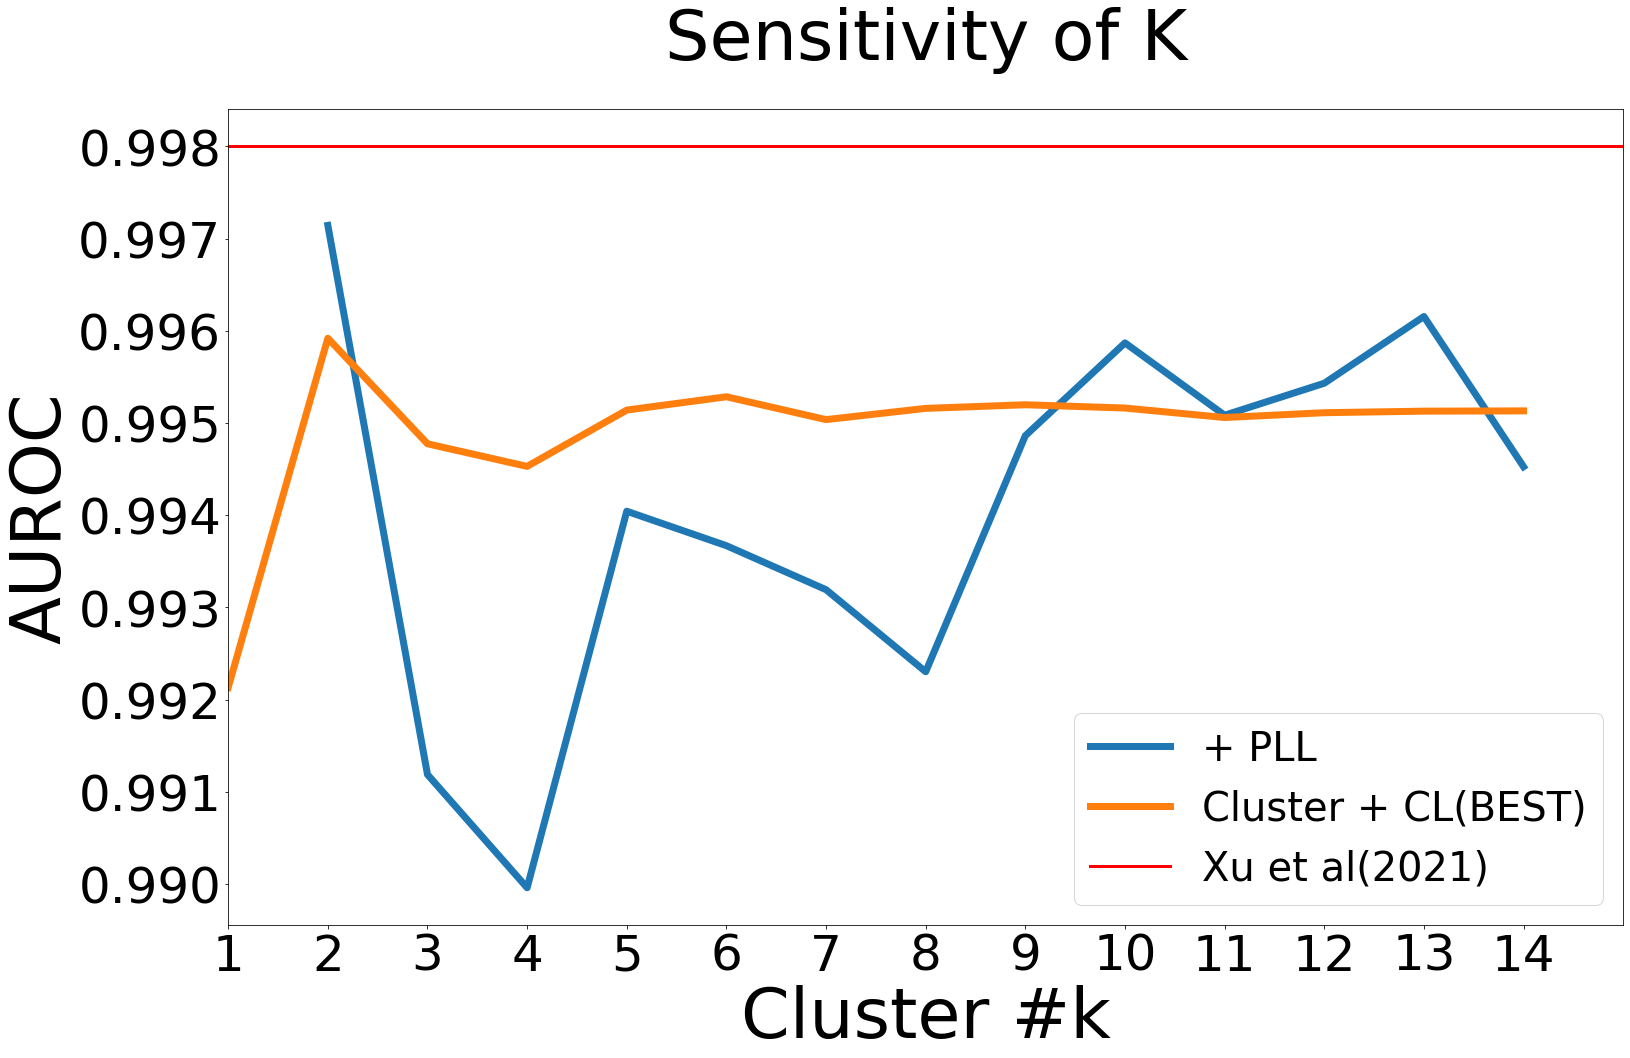

In [156]:
plt.figure(figsize=(25, 15))
plt.rcParams['axes.titlepad'] = 50
graph = sns.lineplot(data=s, x='cluster_num', y ='multi_lw',linewidth=7, dashes=False, label = "+ PLL")
graph = sns.lineplot(data=s_, x='cluster_num', y ='multi_lw',linewidth=7, dashes=False, label = "Cluster + CL(BEST)")
graph.axhline(0.998, linewidth =3, c = "red",label = "Xu et al(2021)")
#graph.axhline(0.97, linewidth =3, c = "green",label = "Supervised")
graph.legend()
plt.legend(fontsize=40)
plt.title("Sensitivity of K", fontsize = 70)
plt.xlim((1,15))
plt.xticks(np.arange(1,15,1), fontsize = 50, rotation = 0)
plt.yticks(fontsize = 50)
plt.ylabel("AUROC",fontsize = 70)
plt.xlabel("Cluster #k",fontsize = 70)